In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Royals players

royals_data = master_data.loc[master_data["Franchise"] == "Royals"]

#Only showing players that signed with the Royals

signed_royals_data = royals_data.loc[royals_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_royals_data.groupby("Year")

#Unsigned Royals draft picks

unsigned_royals_data = royals_data.loc[royals_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1981    51.1
1987    39.7
1971    39.4
1992    38.9
2007    34.5
1982    32.6
1995    31.0
1986    29.6
1991    27.8
1972    25.2
2002    23.4
1974    22.9
1985    20.6
1999    20.1
2005    19.8
2006    18.8
1968    18.3
1983    18.0
2008    17.3
2000    15.5
1993    15.2
2010    13.8
1979    13.6
1973    12.9
2004    12.5
1984    11.5
1994    11.5
1969    10.5
2009    10.3
1975     9.6
1980     8.9
2013     8.6
1997     7.1
1988     6.3
2003     5.6
2012     4.8
2011     4.4
1976     4.3
1970     4.0
1996     2.5
1998     2.3
2014     1.0
2016     0.1
1977     0.0
2017     0.0
2018     0.0
2019     0.0
2015    -0.3
2001    -0.4
1989    -0.8
1990    -1.4
1978    -2.7
Name: Total_WAR, dtype: float64

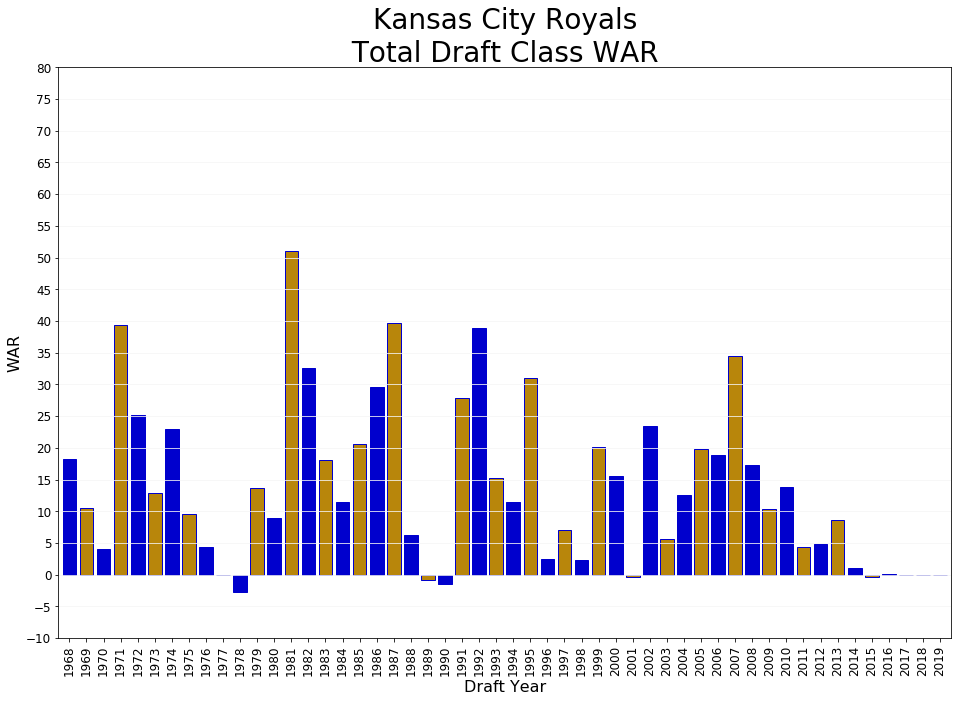

In [8]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["mediumblue", "darkgoldenrod"], width = .8, fontsize = 12, edgecolor = "mediumblue", figsize = (16, 10.5))
plt.title("Kansas City Royals\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 81, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Royals WAR Total by Draft Year.png")
plt.show()

In [9]:
#Best draft picks in franchise history

signed_royals_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
5539,1971,2,29,Royals,Royals,Y,George Brett,1973.0,brettge01,1001400.0,33.0,0.0,33.0,SS,HS,El Segundo HS,El Segundo,CA,More than 25 WAR
14516,1982,19,480,Royals,Royals,Y,Bret Saberhagen,1984.0,saberbr01,1011355.0,0.0,32.5,32.5,SS,HS,Grover Cleveland HS,Reseda,CA,More than 25 WAR
30417,1995,2,49,Royals,Royals,Y,Carlos Beltran,1998.0,beltrca01,589.0,29.0,0.0,29.0,OF,HS,Fernando Callejo HS,Manati,PR,More than 25 WAR
18266,1987,1,9,Royals,Royals,Y,Kevin Appier,1989.0,appieke01,3.0,0.0,28.6,28.6,RHP,JC,Antelope Valley College,Lancaster,CA,More than 25 WAR
13258,1981,3,74,Royals,Royals,Y,David Cone,1986.0,coneda01,1680.0,0.7,26.0,26.7,RHP,HS,Rockhurst HS,Kansas City,MO,More than 25 WAR
13218,1981,2,34,Royals,Royals,Y,Mark Gubicza,1984.0,gubicma01,1005115.0,0.0,25.8,25.8,RHP,HS,William Penn Charter School,Philadelphia,PA,More than 25 WAR
6353,1972,2,42,Royals,Royals,Y,Dennis Leonard,1974.0,leonade01,1007531.0,0.0,25.1,25.1,RHP,4Yr,Iona College,New Rochelle,NY,More than 25 WAR
41239,2002,1,6,Royals,Royals,Y,Zack Greinke,2004.0,greinza01,1943.0,0.1,23.8,23.9,RHP,HS,Apopka HS,Apopka,FL,20-25 WAR
7867,1974,1,18,Royals,Royals,Y,Willie Wilson,1976.0,wilsowi02,1014113.0,22.9,0.0,22.9,OF,HS,Summit HS,Summit,NJ,20-25 WAR
45695,2005,1,2,Royals,Royals,Y,Alex Gordon,2007.0,gordoal01,5209.0,20.6,0.0,20.6,3B,4Yr,University of Nebraska-Lincoln,Lincoln,NE,20-25 WAR


In [10]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_royals_data.loc[((signed_royals_data["WAR Group"] == "Less than 5 WAR") |
(signed_royals_data["WAR Group"] == "No Major League Experience")) & 
(signed_royals_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
4591,1970,1,8,Royals,Royals,Y,Rex Goodson,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Pine Tree HS,Longview,TX,No Major League Experience
5515,1971,1,5,Royals,Royals,Y,Roy Branch,1979.0,brancro01,1001344.0,0.0,0.0,0.0,RHP,HS,Beaumont HS,St. Louis,MO,Less than 5 WAR
6329,1972,1,18,Royals,Royals,Y,Jamie Quirk,1975.0,quirkja01,1010621.0,-1.6,0.0,-1.6,SS,HS,St. Paul HS,Santa Fe Springs,CA,Less than 5 WAR
7111,1973,1,9,Royals,Royals,Y,Lew Olsen,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,San Ramon Valley HS,Danville,CA,No Major League Experience
8545,1975,1,9,Royals,Royals,Y,Clint Hurdle,1977.0,hurdlcl01,1006216.0,3.9,0.0,3.9,OF,HS,Merritt Island HS,Merritt Island,FL,Less than 5 WAR
9233,1976,1,18,Royals,Royals,Y,Ben Grzybek,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Hialeah HS,Hialeah,FL,No Major League Experience
9949,1977,1,21,Royals,Royals,Y,Mike Jones,1980.0,jonesmi02,1006577.0,0.0,0.1,0.1,LHP,HS,Sutherland HS,Pittsford,NY,Less than 5 WAR
10728,1978,1,25,Royals,Royals,Y,Buddy Biancalana,1982.0,biancbu01,1000942.0,-1.8,0.0,-1.8,SS,HS,Redwood HS,Greenbrae,CA,Less than 5 WAR
12368,1980,1,16,Royals,Royals,Y,Frank Wills,1983.0,willsfr01,1014051.0,0.0,1.7,1.7,RHP,4Yr,Tulane University,New Orleans,LA,Less than 5 WAR
13207,1981,1,23,Royals,Royals,Y,Dave Leeper,1984.0,leepeda01,1007463.0,-1.1,0.0,-1.1,OF,4Yr,University of Southern California,Los Angeles,CA,Less than 5 WAR


In [11]:
#Best unsigned draft picks in franchise history

unsigned_royals_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
14127,1982,4,90,Royals,Royals,N,Will Clark,1986.0,clarkwi02,1002318.0,31.7,0.0,31.7,1B,HS,Jesuit HS,New Orleans,LA,More than 25 WAR
11119,1978,16,415,Royals,Royals,N,Frank Viola,1982.0,violafr01,1013435.0,0.0,23.0,23.0,LHP,HS,East Meadow HS,East Meadow,NY,20-25 WAR
8105,1974,11,258,Royals,Royals,N,Scott Sanderson,1978.0,sandesc01,1011422.0,-0.2,15.8,15.6,RHP,HS,Glenbrook North HS,Northbrook,IL,15-20 WAR
13284,1981,4,100,Royals,Royals,N,Shane Mack,1987.0,macksh01,1007928.0,15.1,0.0,15.1,SS,HS,Gahr HS,Cerritos,CA,15-20 WAR
53564,2010,13,389,Royals,Royals,N,Jon Gray,2015.0,grayjo02,14916.0,-0.9,13.1,12.2,RHP,HS,Chandler HS,Chandler,OK,10-15 WAR
27802,1993,31,861,Royals,Royals,N,Jacque Jones,1999.0,jonesja05,735.0,11.2,0.0,11.2,OF,HS,San Diego HS,San Diego,CA,10-15 WAR
15607,1983,30,739,Royals,Royals,N,Todd Zeile,1989.0,zeileto01,457.0,10.1,0.0,10.1,C,HS,William S. Hart HS,Santa Clarita,CA,10-15 WAR
9046,1975,22,510,Royals,Royals,N,Ron Hassey,1978.0,hassero01,1005479.0,8.7,0.0,8.7,3B,4Yr,University of Arizona,Tucson,AZ,5-10 WAR
19504,1987,65,1247,Royals,Royals,N,Bret Barberie,1991.0,barbebr01,1000524.0,7.5,0.0,7.5,INF,JC,Cerritos College,Norwalk,CA,5-10 WAR
16683,1985,6,149,Royals,Royals,N,Deion Sanders,1989.0,sandede02,1011415.0,6.3,0.0,6.3,OF,HS,North Fort Myers HS,North Fort Myers,FL,5-10 WAR


In [12]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_royals_data.loc[signed_royals_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
14516,1982,19,480,Royals,Royals,Y,Bret Saberhagen,1984.0,saberbr01,1011355.0,0.0,32.5,32.5,SS,HS,Grover Cleveland HS,Reseda,CA,More than 25 WAR
15151,1983,11,283,Royals,Royals,Y,Kevin Seitzer,1986.0,seitzke01,1011730.0,18.7,0.0,18.7,3B,4Yr,Eastern Illinois University,Charleston,IL,15-20 WAR
3203,1968,25,575,Royals,Royals,Y,Paul Splittorff,1970.0,splitpa01,1012346.0,0.3,16.1,16.4,LHP,4Yr,Morningside College,Sioux City,IA,15-20 WAR
27410,1993,17,469,Royals,Royals,Y,Glendon Rusch,1997.0,ruschgl01,707.0,0.0,14.5,14.5,LHP,HS,Shorecrest HS,Shoreline,WA,10-15 WAR
19483,1987,58,1226,Royals,Royals,Y,Jeff Conine,1990.0,coninje01,131.0,12.8,0.0,12.8,3B,4Yr,University of California Los Angeles,Los Angeles,CA,10-15 WAR
28993,1994,12,331,Royals,Royals,Y,Jose Rosado,1996.0,rosadjo01,1011192.0,-0.1,11.6,11.5,LHP,JC,Galveston College,Galveston,TX,10-15 WAR
24218,1991,11,288,Royals,Royals,Y,Joe Randa,1995.0,randajo01,623.0,11.0,0.0,11.0,3B,4Yr,University of Tennessee,Knoxville,TN,10-15 WAR
17783,1986,16,417,Royals,Royals,Y,Greg Hibbard,1989.0,hibbagr01,1005764.0,-0.3,10.9,10.6,LHP,4Yr,University of Alabama,Tuscaloosa,AL,10-15 WAR
48669,2006,50,1475,Royals,Royals,Y,Jarrod Dyson,2010.0,dysonja01,4866.0,10.3,0.0,10.3,OF,4Yr,Southwest Mississippi Community College,Summit,MS,10-15 WAR
4567,1969,75,1028,Royals,Royals,Y,Al Cowens,1974.0,cowenal01,1002689.0,9.9,0.0,9.9,SS,HS,Centennial HS,Compton,CA,5-10 WAR


In [13]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(royals_data["Year"], royals_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1968,30.6,67.3,2.0
1969,17.8,73.3,8.9
1970,16.2,78.4,5.4
1971,17.6,82.4,0.0
1972,43.2,54.1,2.7
1973,23.1,71.2,5.8
1974,25.7,62.9,11.4
1975,33.3,66.7,0.0
1976,31.8,68.2,0.0


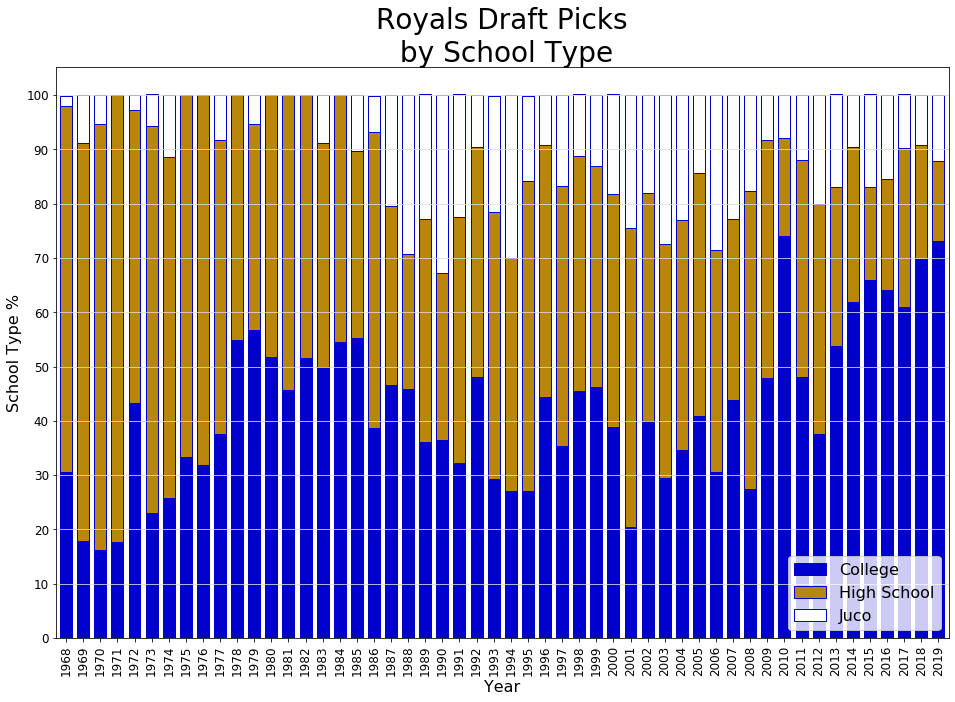

In [15]:
#Bar chart of table above

colors = ["mediumblue", "darkgoldenrod", "white"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "mediumblue", stacked = True, figsize = (16, 10.5))
plt.title("Royals Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "gainsboro", linestyle = "-", axis = "y")
plt.savefig("Royals Draft Picks by School Type.png")
plt.show()